In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Solamente para usuarios de Jupyter Themes
from jupyterthemes import jtplot
jtplot.style(grid=False)

In [8]:

from get_images import get_images

In [9]:
# MNIST path
mnist_path = './mnist_raw/'

x_train_num, y_train_num, x_test_num, y_test_num = get_images(mnist_path)
x_test_num.shape


(10000, 28, 28)

In [ ]:

x_train = x_train_num[:50000].reshape(50000, -1).astype(np.float32) 
y_train = y_train_num[:50000].reshape(50000, 1)

x_val = x_train_num[50000:].reshape(10000, -1).astype(np.float)
y_val = y_train_num[50000:].reshape(10000, 1)

x_test = x_test_num.copy().reshape(10000, -1).astype(np.float) 
y_test = y_test_num.copy().reshape(10000, 1)

/tmp/ipykernel_4905/2211372728.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_val = x_train_num[50000:].reshape(10000, -1).astype(np.float)
/tmp/ipykernel_4905/2211372728.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = x_test_num.copy().reshape(10000, -1).astype(np.float)


In [ ]:
def normalise(x_mean, x_std, x_data):
    return (x_data-x_mean)/x_std

In [ ]:
x_t = normalise(
    x_train[:128].mean(),
    x_train[:128].std(),
    x_train[:128])
x_t.min(), x_t.max(), x_t.mean(), x_t.std()

NameError: name 'x_t' is not defined

In [50]:
print(x_train.shape) #shape (50000, 784)
print(y_train.shape) #shape (50000, 1)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 784)
(50000, 1)
(10000, 784)
(10000, 1)
(10000, 784)
(10000, 1)


In [51]:
def plot_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

La imagen muestreada representa un: 3


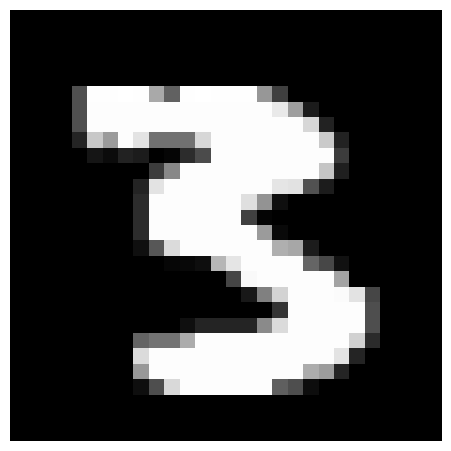

In [52]:
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {y_test[rnd_idx][0]}')
plot_number(x_test_num[rnd_idx])

In [53]:
x_train.shape[0]


50000

In [54]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle: 
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
        
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

Inizialización de pesos sonápticos de Valores aleatorios, Xavier, y Kaiming He


Normal random

In [59]:
def init_paramas(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights[f'L{i+1}'] = np.random.randn(neurons[i+1], neurons[i]) * 0.001
    return weights

Xavier


In [58]:
def init_xavier(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights[f'L{i+1}'] = np.random.randn(neurons[i+1], neurons[i]) /  np.sqrt(neurons[i])
    return weights

Kaiming He

In [90]:
def init_kaiming(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights[f'L{i+1}'] = np.random.randn(neurons[i+1], neurons[i]) /  np.sqrt(neurons[i]/2)
    return weights

In [91]:
neurons = [500]*10
neurons[0] = 784
neurons[-1] = 10

In [92]:
print(neurons)

[784, 500, 500, 500, 500, 500, 500, 500, 500, 10]


In [93]:
weights =  init_paramas(neurons)
weights_x =  init_xavier(neurons)
weights_kaiming =  init_kaiming(neurons)

In [94]:
acts = {}
z = x_t.T
for (k, v) in weights.items():
    z = v @ z
    acts[k] = z
print(acts.keys())


dict_keys(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])


La activación L1 tiene una media de -0.000521 y una std de 0.02803
La activación L2 tiene una media de -2.539e-05 y una std de 0.0006327
La activación L3 tiene una media de -4.333e-08 y una std de 1.387e-05
La activación L4 tiene una media de 1.334e-08 y una std de 3.061e-07
La activación L5 tiene una media de -1.303e-10 y una std de 6.877e-09
La activación L6 tiene una media de -1.837e-12 y una std de 1.53e-10
La activación L7 tiene una media de -1.105e-13 y una std de 3.352e-12
La activación L8 tiene una media de -2.21e-16 y una std de 7.451e-14
La activación L9 tiene una media de -2.34e-16 y una std de 1.591e-15


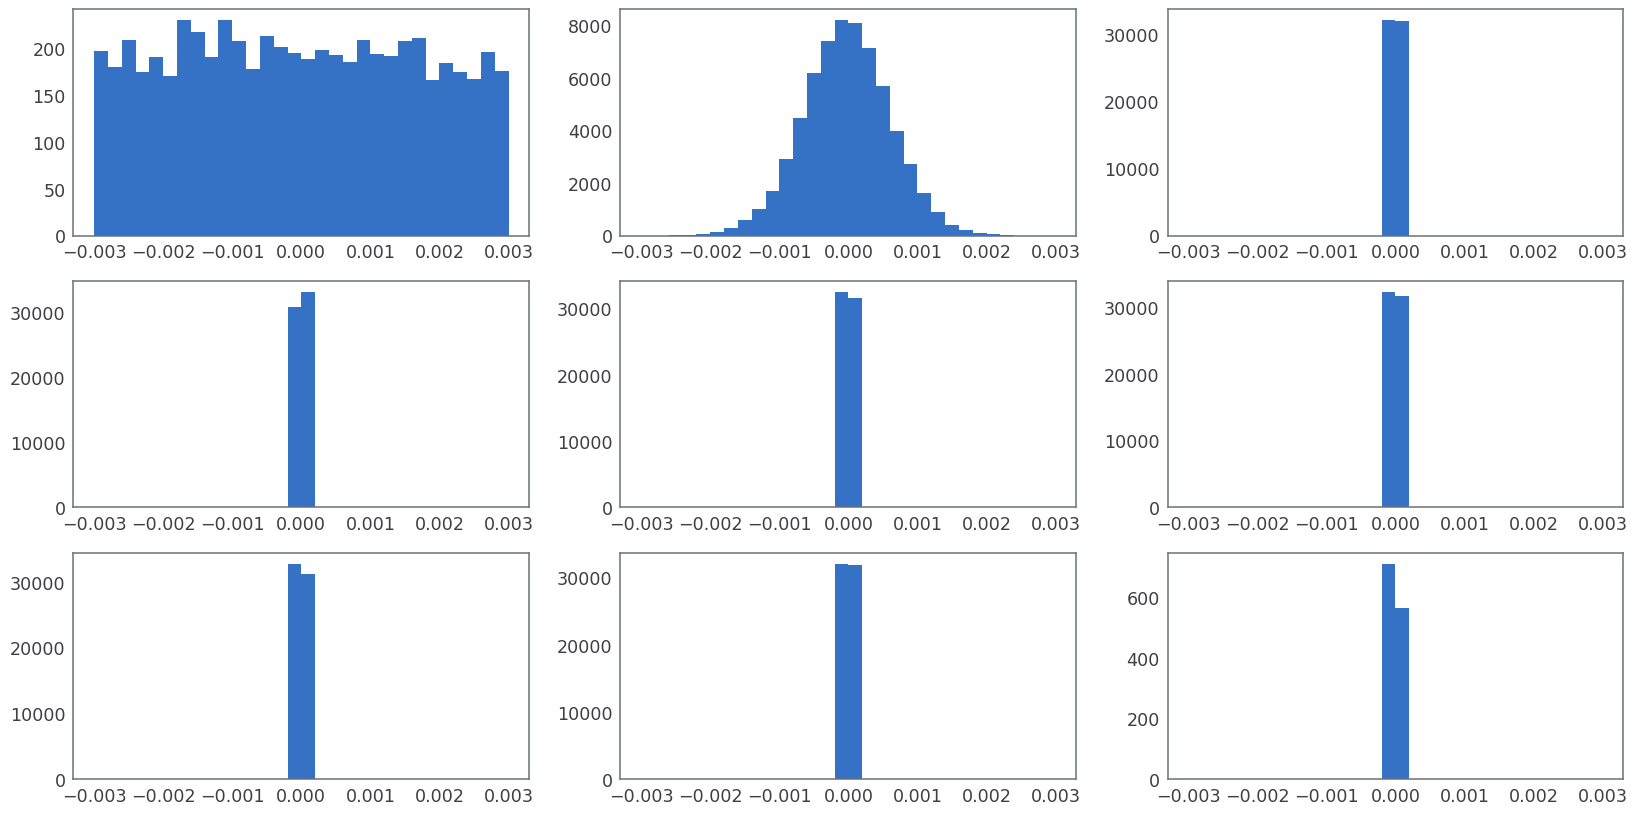

In [95]:
plt.figure(figsize=(20, 10))

for i, (k, v) in enumerate(acts.items()):
    print(f'La activación {k} tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')


for i, (k, v) in enumerate(acts.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-.003, .003])


plt.show()


### Prueba con Xavier init

dict_keys(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])
La activación L1 tiene una media de 0.4024 y una std de 0.5917
La activación L2 tiene una media de 0.2796 y una std de 0.4221
La activación L3 tiene una media de 0.2087 y una std de 0.3049
La activación L4 tiene una media de 0.1398 y una std de 0.2177
La activación L5 tiene una media de 0.09585 y una std de 0.1471
La activación L6 tiene una media de 0.06672 y una std de 0.1042
La activación L7 tiene una media de 0.05255 y una std de 0.07527
La activación L8 tiene una media de 0.03444 y una std de 0.0528
La activación L9 tiene una media de 0.02963 y una std de 0.03935


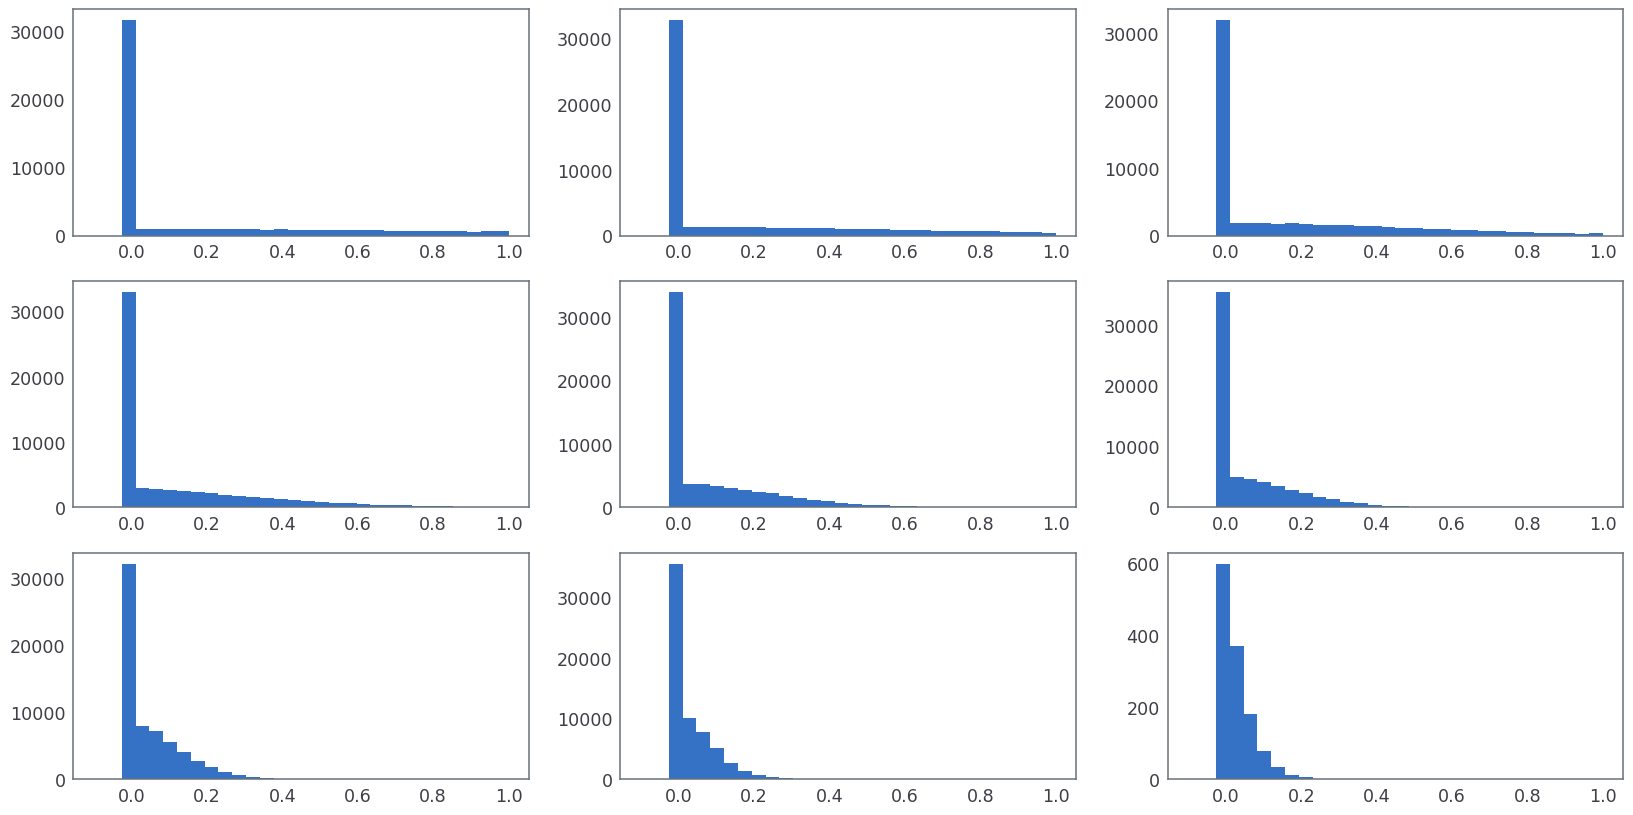

In [96]:
acts = {}
z = x_t.T
for (k, v) in weights_x.items():
    z = v @ z
    # z = np.tanh(z)
    z = np.maximum(0, z)
    # z = 1/(1+np.exp(-z))
    acts[k] = z
print(acts.keys())
plt.figure(figsize=(20, 10))

for i, (k, v) in enumerate(acts.items()):
    print(f'La activación {k} tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')


for i, (k, v) in enumerate(acts.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-.1, 1])


plt.show()


## Prueba con Xavier init

dict_keys(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])
La activación L1 tiene una media de 0.5584 y una std de 0.8294
La activación L2 tiene una media de 0.5513 y una std de 0.8218
La activación L3 tiene una media de 0.5471 y una std de 0.8342
La activación L4 tiene una media de 0.5879 y una std de 0.8406
La activación L5 tiene una media de 0.556 y una std de 0.8529
La activación L6 tiene una media de 0.55 y una std de 0.8252
La activación L7 tiene una media de 0.5539 y una std de 0.821
La activación L8 tiene una media de 0.5975 y una std de 0.8584
La activación L9 tiene una media de 0.03443 y una std de 0.135


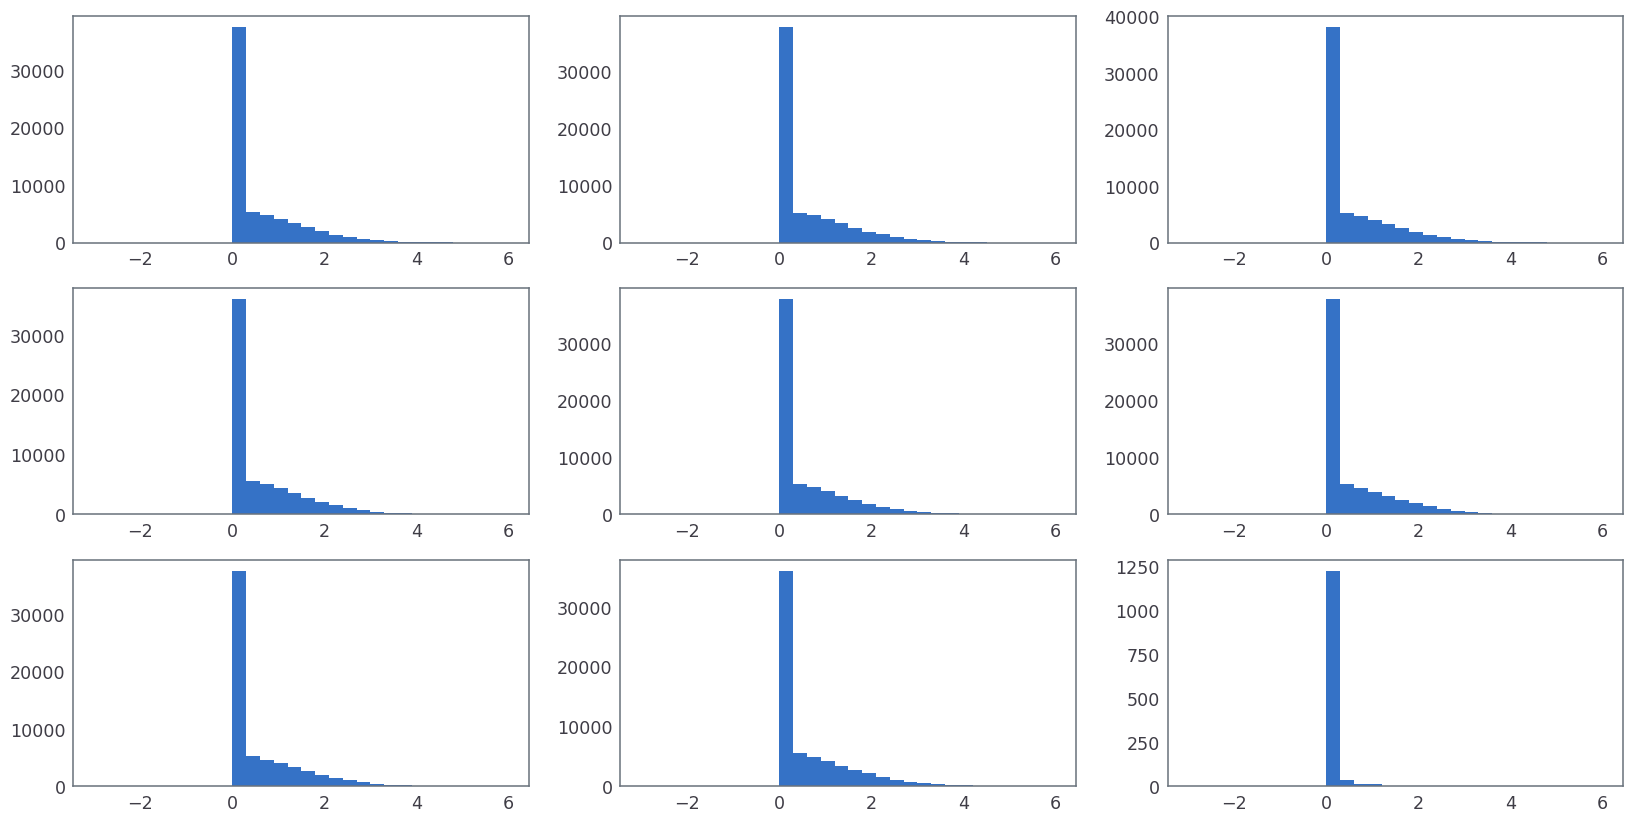

In [100]:
acts = {}
z = x_t.T
for (k, v) in weights_kaiming.items():
    z = v @ z
    z = np.maximum(0, z)
    acts[k] = z
print(acts.keys())
plt.figure(figsize=(20, 10))

for i, (k, v) in enumerate(acts.items()):
    print(f'La activación {k} tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')


for i, (k, v) in enumerate(acts.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-3, 6])


plt.show()

Init parameters

In [55]:
def init_parameters(input_size: int, neurons: list) -> dict:
    '''
    input_size -> elemntos de entrada, 784,
    neurons -> list [200, 10] cib cabtudad de neuronas
    
    '''
    W1 = np.random.randn(neurons[0], input_size) * 0.001
    b1 = np.zeros((neurons[0], 1))
    
    W2 = np.random.randn(neurons[1], neurons[0]) * 0.001
    b2 = np.zeros((neurons[1], 1))
    
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2':b2}

In [17]:
parameters = init_parameters(28*28, [200, 10])
print(parameters['W1'].shape)
print(parameters['W2'].shape)
print(parameters['b2'].shape)

(200, 784)
(10, 200)
(10, 1)


In [18]:
def relu(x):
    return np.maximum(0, x)

In [19]:
def scores(x, parameters, activation_fcn):
    '''
    x tiene la forma (#pixeles, num samples)
    '''
    z1 = parameters['W1'] @ x + parameters['b1']
    a1 = activation_fcn(z1) # devuel fcn. de activa.
    z2 = parameters['W2'] @ a1 + parameters['b2']
    
    return z2, z1, a1

In [20]:
z2, z1, a1 = scores(x_train[:64].T, parameters, relu) 

In [21]:
z2.shape

(10, 64)

In [22]:
def softmax(x):
    exp_scores = np.exp(x)
    sum_exp_scores = np.sum(exp_scores, axis=0)
    probs = exp_scores/sum_exp_scores
    return probs

In [23]:
def x_entropy(scores, y, batch_size=64):
    probs = softmax(scores)
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    
    return probs, cost

In [24]:
def backward(probs, x, y, z1, a1, scores, parameters, batch_size=64):
    grads = {}
    probs[y.squeeze(), np.arange(batch_size)] -= 1 # y-hat - y
    dz2 = probs.copy()
    
    dW2 = dz2 @ a1.T / batch_size
    db2 = np.sum(dz2, axis =1, keepdims=True) / batch_size
    da1 = parameters['W2'].T @ dz2
    
    dz1 = da1.copy()
    dz1[z1 <= 0 ] =0
    
    dW1 = dz1 @ x 
    db1 = np.sum(dz1, axis=1, keepdims=True) 
    
    assert parameters['W1'].shape == dW1.shape, 'W1 no igual forma'
    assert parameters['W2'].shape == dW2.shape, 'W2 no igual forma'
    assert parameters['b1'].shape == db1.shape, 'b1 no igual forma'
    assert parameters['b2'].shape == db2.shape, 'b2 no igual forma'
    
    grads = {'w1':dW1,  'b1':db1, 'W2':dW2, 'b2':db2}
    
    return grads
    

In [25]:
y_hat, cost = x_entropy(z2, y_train[:64])

In [26]:
def accuracy(x_data, y_data, mb_size=64):
    correct = 0
    total = 0
    
    for i, (x, y) in enumerate(create_minibatches(mb_size, x_data, y_data)):
        lenght = len(x)
        z2, z1, a1 = scores(x.T, parameters, relu)
        y_hat, cost = x_entropy(z2, y, batch_size=lenght)
        
        correct +=   np.sum(np.argmax(y_hat, axis=0) == y.squeeze())
        total += y_hat.shape[1]
    return correct/total

In [27]:
def train(epochs, parameters, mb_size=64, learning_rate=1e-3):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            lenght = len(x)
            z2, z1, a1 = scores(x.T, parameters, relu)
            y_hat, cost = x_entropy(z2, y, batch_size=lenght)
            grads = backward(y_hat, x, y, z1, a1, z2, parameters, batch_size=lenght)
            
            parameters['W1'] -= learning_rate*grads['w1']
            parameters['b1'] -= learning_rate*grads['b1']
            parameters['W2'] -= learning_rate*grads['W2']
            parameters['b2'] -= learning_rate*grads['b2']
            
        print(f'El costo es: {cost}, y accuracy: {accuracy(x_val, y_val, mb_size)}')        
    return parameters
    

In [28]:
mb_size = 128
learning_rate = 1e-2
epochs = 20

parameters = train(epochs=epochs, parameters=parameters, mb_size=mb_size, learning_rate=learning_rate)



El costo es: 0.33900227867937616, y accuracy: 0.9049
El costo es: 0.4266020910598042, y accuracy: 0.9217
El costo es: 0.22542708658124497, y accuracy: 0.9318
El costo es: 0.23999437692468706, y accuracy: 0.941
El costo es: 0.13085330605876785, y accuracy: 0.95
El costo es: 0.2619420374456448, y accuracy: 0.9552
El costo es: 0.12798370692103983, y accuracy: 0.9581
El costo es: 0.10124636813288423, y accuracy: 0.9619
El costo es: 0.09953408768672647, y accuracy: 0.9636
El costo es: 0.08036204448597423, y accuracy: 0.9644
El costo es: 0.08055723877238817, y accuracy: 0.966
El costo es: 0.11687660133124067, y accuracy: 0.9694
El costo es: 0.13043864657418397, y accuracy: 0.9691
El costo es: 0.11428646666689546, y accuracy: 0.9721
El costo es: 0.041575967770450216, y accuracy: 0.9719
El costo es: 0.09657533050757516, y accuracy: 0.9729
El costo es: 0.0730278348110202, y accuracy: 0.9736
El costo es: 0.04925574630283428, y accuracy: 0.9749
El costo es: 0.015919140865676064, y accuracy: 0.975

In [29]:
accuracy(x_test, y_test, mb_size)

0.9752

In [30]:
def predict(x):
    scores2, _, _ = scores(x, parameters, relu)
    return np.argmax(scores2)

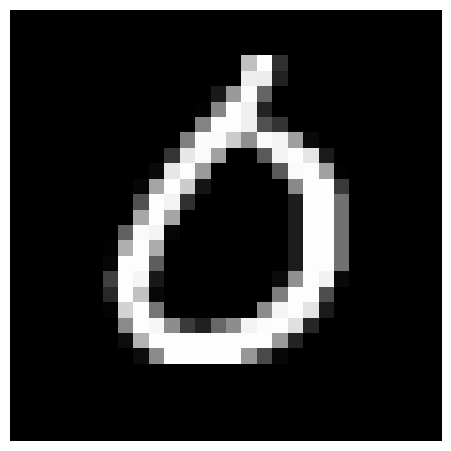

El valor predicho es: 0


In [46]:
idx = np.random.randint(len(y_test))
plot_number(x_test_num[idx])
pred = predict(x_test[idx].reshape(-1, 1))
print(f'El valor predicho es: {pred}')